In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [89]:
prefix = "thrustData_3s_"
extension = ".txt"
#uniquenames = ["5x4.5x3_100perc","6x4x2_100perc","8x4x2_50perc","8x4x2_100perc"]
uniquenames = ["5x4.5x3_100perc","6x4x2_100perc","8x4x2_100perc"]
filenames =[]

#filenames.append("thrustData_2s_5x4.5x3_70perc.txt")
for name in uniquenames:
    filenames.append(prefix+name+extension)

In [90]:
filenames

['thrustData_3s_5x4.5x3_100perc.txt',
 'thrustData_3s_6x4x2_100perc.txt',
 'thrustData_3s_8x4x2_100perc.txt']

In [91]:
throttle = {}
thrust = {}
for filename in filenames:
    with open(filename,'r') as f:
        throttle[filename] = []
        thrust[filename] = []
        for line in f:
            if (not ("Throttle:" in  line)) and (not("Thrust:" in line)):
                continue
            else:
                #print(line)
                th = line.split("Thrust: ")[1].split(" grams")[0]
                if not th=='':
                    throttle[filename].append(float(line.split("Throttle: ")[1].split("%")[0]))
                    thrust[filename].append(float(th))

In [92]:
xfit = np.linspace(0,100,10)
yfit = {}
for filename in filenames:
    a,b,c = np.polyfit(throttle.get(filename),thrust.get(filename),2)
    yfit[filename] = a*xfit**2 + b*xfit + c

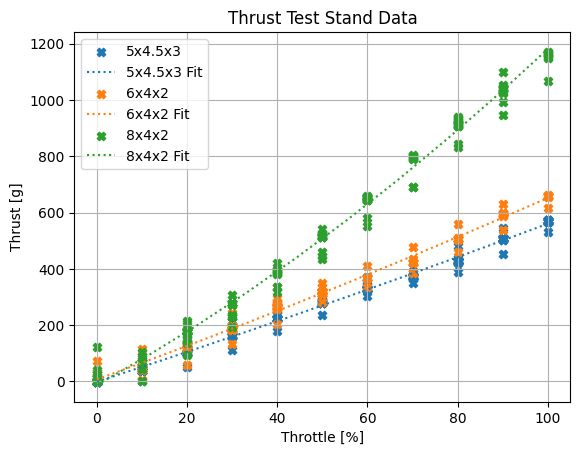

In [93]:
for filename in filenames:
    propName = filename.split("s_")[1].split(extension)[0].split("_")[0]
    plt.scatter(throttle.get(filename),thrust.get(filename),label=propName,marker="X")
    plt.plot(xfit,yfit.get(filename),label=propName+" Fit",linestyle=":")
plt.xlabel("Throttle [%]")
plt.ylabel("Thrust [g]")
plt.grid()
plt.title("Thrust Test Stand Data")
plt.legend()

5-6 in propellers produce similar thrust, 5 has 3 vanes and 6 has 2. 5x4.5 vs 6x4<br>
8in propeller produces significantly more thrust, at a higher power consumption. Need to check if <br>
the current draw and overall power usage is below motor max of 40A and 342W. 

7in propellers may be the sweet spot if the power draw from 8x4 is too much.